In [45]:
# 모델링 관련 모듈
import torch
import torch.nn as nn  
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

from torch.utils.data import DataLoader
from torchinfo import summary

from torchmetrics.classification import MulticlassF1Score, MulticlassConfusionMatrix

import torchvision.models as models

# 데이터 분석 관련 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 이미지 관련 모듈
import cv2
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2

# 기타 모듈
import os

# 활용패키지 버전 체크
print(f'torch Version  : {torch.__version__}')
print(f'pandas Version : {pd.__version__}')
print(f'numpy Version  : {np.__version__}')

torch Version  : 2.4.1
pandas Version : 2.0.3
numpy Version  : 1.24.3


In [46]:
# Device 설정
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [47]:
# 이미지 출력해보기
IMG_PATH1 = '../TORCH_IMAGE/project/banana/'
IMG_FILE1 = IMG_PATH1+'freshBanana (274).jpg'

In [48]:
cv_img = cv2.imread(IMG_FILE1)
# 이미지 파일의 경로를 인자로 받아들이고, 해당 이미지를 NumPy 배열 형태로 반환
cv_img = cv2.cvtColor(cv_img,cv2.COLOR_BGR2RGB)
pil_img = Image.open(IMG_FILE1)

In [49]:
print(f'type(cv_img) : {type(cv_img)}, cv_img.shape : {cv_img.shape}')
print(f'type(pil_img) : {type(pil_img)}')

type(cv_img) : <class 'numpy.ndarray'>, cv_img.shape : (224, 224, 3)
type(pil_img) : <class 'PIL.JpegImagePlugin.JpegImageFile'>


- ndarray ==> Tensor <hr>

In [50]:
# 일반적인 텐서 생성 [H,W,C]
cvTensor1 = torch.tensor(cv_img)
print(f'cvTensor1 : {cvTensor1.shape}, {cvTensor1.ndim}D')

# 이미지용 텐서 생성 ==> 채널 순서/ 위치 자동 [C, H, W]
cvTensor2 = transforms.ToTensor()(cv_img)
print(f'cvTensor2 : {cvTensor2.shape}, {cvTensor2.ndim}D')

cvTensor1 : torch.Size([224, 224, 3]), 3D
cvTensor2 : torch.Size([3, 224, 224]), 3D


In [51]:
# 일반적인 텐서 생성 [H, W, C]
pilTensor1 = torch.tensor(np.array(pil_img))
print(f'pilTensor1 : {pilTensor1.shape}, {pilTensor1.ndim}D')

# 이미지용 텐서 생성 ==> 채널 순서/위치 자동 [C, H, W]
# 방법 1 : transforms.ToTensor()
pilTensor2 = transforms.ToTensor()(np.array(pil_img))
print(f'pilTensor2 : {pilTensor2.shape}, {pilTensor2.ndim}D')
# 방법 2 : transforms.PILToTensor()
pilTensor3 = transforms.PILToTensor()(pil_img)
print(f'pilTensor3 : {pilTensor3.shape}, {pilTensor3.ndim}D')

pilTensor1 : torch.Size([224, 224, 3]), 3D
pilTensor2 : torch.Size([3, 224, 224]), 3D
pilTensor3 : torch.Size([3, 224, 224]), 3D


- 이미지 파일 => 하나로 합치기 <hr>

In [52]:
# 이미지 파일 => 하나로 합치기
# 데이터 관련 설정
IMG_PATH = '../TORCH_IMAGE/project/fruits/'

In [53]:
# 데이터 변형 및 전처리 (이미지 확인용)
transConvert1 = v2.Compose([v2.Resize(size=(232)), v2.ToImage(), 
                            v2.ToDtype(torch.float32, scale=True)])

In [54]:
# 데이터셋 생성
imgDS1 = ImageFolder(root=IMG_PATH, transform=transConvert1)

In [55]:
print(f'imgDS1.classes : {imgDS1.classes}')
print(f'imgDS1.class_to_idx : {imgDS1.class_to_idx}')
print(f'imgDS1.targets : {imgDS1.targets}')
for img in imgDS1.imgs:
    print(f'imgDS1.imgs : {img}')

imgDS1.classes : ['apple', 'banana', 'orange', 'strawberry']
imgDS1.class_to_idx : {'apple': 0, 'banana': 1, 'orange': 2, 'strawberry': 3}
imgDS1.targets : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

- Tensor ==> ndarray <hr>

cvNP : (224, 224, 3), 3D


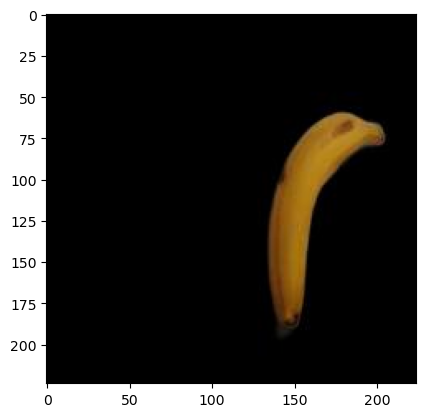

In [56]:
cvNP = cvTensor1.numpy()
print(f'cvNP : {cvNP.shape}, {cvNP.ndim}D')

plt.imshow(cvNP)
plt.show()

- The inference transforms are available at ResNet50_Weights.IMAGENET1K_V2.transforms and perform the following preprocessing operations: Accepts PIL.Image, batched (B, C, H, W) and single (C, H, W) image torch.Tensor objects. The images are resized to resize_size=[232] using interpolation=InterpolationMode.BILINEAR, followed by a central crop of crop_size=[224]. Finally the values are first rescaled to [0.0, 1.0] and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].

In [57]:
## 데이터 변형 및 전처리
transConvert = v2.Compose([v2.Resize([232]), v2.CenterCrop(224),v2.ToTensor(),
                           # The transform `ToTensor()` is deprecated and will be removed in a future release. 
                           # Instead, please use v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
                           v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                           v2.ToDtype(torch.float32, scale=True)])

c:\Users\kdp\anaconda3\envs\TORCH_CV_38\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [58]:
# ## 데이터 변형 및 전처리
# transConvert = v2.Compose([v2.Resize([232]), v2.CenterCrop(224),v2.ToImage(),
#                            v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#                            v2.ToDtype(torch.float32, scale=True)])

In [59]:
imgDS = ImageFolder(root=IMG_PATH, transform= transConvert)

KeyboardInterrupt: 

In [16]:
imgDL = DataLoader(imgDS, batch_size=32, shuffle=True)

In [38]:
for features, targets in imgDL:
    print(features)
    print(features.shape)
    print(targets)
    break

tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ...,  2.2318,  2.2318,  2.2318],
          [-2.1179, -2.1179, -2.1179,  ...,  2.2318,  2.2318,  2.2318],
          [-2.1179, -2.1179, -2.1179,  ...,  2.2318,  2.2318,  2.2318]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ...,  2.3761,  2.3761,  2.3761],
          [-2.0357, -2.0357, -2.0357,  ...,  2.3761,  2.3761,  2.3761],
          [-2.0357, -2.0357, -2.0357,  ...,  2.3761,  2.3761,  2.3761]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044, -

In [18]:
print(f'imgDS.classes : {imgDS.classes}')
print(f'imgDS.class_to_idx : {imgDS.class_to_idx}')
print(f'imgDS.targets : {imgDS.targets}')

imgDS.classes : ['apple', 'banana', 'orange', 'strawberry']
imgDS.class_to_idx : {'apple': 0, 'banana': 1, 'orange': 2, 'strawberry': 3}
imgDS.targets : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [19]:
# 사전학습된 모델 로딩
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

In [20]:
# 모델 구조 확인
print(model)
summary(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─Bottleneck: 2-1                   --
│    │    └─Conv2d: 3-1                  4,096
│    │    └─BatchNorm2d: 3-2             128
│    │    └─Conv2d: 3-3                  36,864
│    │    └─BatchNorm2d: 3-4             128
│    │    └─Conv2d: 3-5                  16,384
│    │    └─BatchNorm2d: 3-6             512
│    │    └─ReLU: 3-7                    --
│    │    └─Sequential: 3-8              16,896
│    └─Bottleneck: 2-2                   --
│    │    └─Conv2d: 3-9                  16,384
│    │    └─BatchNorm2d: 3-10            128
│    │    └─Conv2d: 3-11                 36,864
│    │    └─BatchNorm2d: 3-12            128
│    │    └─Conv2d: 3-13               

In [21]:
# 사전학습된 모델의 파라미터 비활성화 설정
for named, param in model.named_parameters():
    print(f'[{named}] - {param.shape}')
    param.requires_grad = False

[conv1.weight] - torch.Size([64, 3, 7, 7])
[bn1.weight] - torch.Size([64])
[bn1.bias] - torch.Size([64])
[layer1.0.conv1.weight] - torch.Size([64, 64, 1, 1])
[layer1.0.bn1.weight] - torch.Size([64])
[layer1.0.bn1.bias] - torch.Size([64])
[layer1.0.conv2.weight] - torch.Size([64, 64, 3, 3])
[layer1.0.bn2.weight] - torch.Size([64])
[layer1.0.bn2.bias] - torch.Size([64])
[layer1.0.conv3.weight] - torch.Size([256, 64, 1, 1])
[layer1.0.bn3.weight] - torch.Size([256])
[layer1.0.bn3.bias] - torch.Size([256])
[layer1.0.downsample.0.weight] - torch.Size([256, 64, 1, 1])
[layer1.0.downsample.1.weight] - torch.Size([256])
[layer1.0.downsample.1.bias] - torch.Size([256])
[layer1.1.conv1.weight] - torch.Size([64, 256, 1, 1])
[layer1.1.bn1.weight] - torch.Size([64])
[layer1.1.bn1.bias] - torch.Size([64])
[layer1.1.conv2.weight] - torch.Size([64, 64, 3, 3])
[layer1.1.bn2.weight] - torch.Size([64])
[layer1.1.bn2.bias] - torch.Size([64])
[layer1.1.conv3.weight] - torch.Size([256, 64, 1, 1])
[layer1.1.b

In [30]:
model.fc = nn.Linear(2048,4)

In [31]:
# 파라미터 확인
for named, param in model.named_parameters():
    print(f'[{named}] - {param.shape}')

[conv1.weight] - torch.Size([64, 3, 7, 7])
[bn1.weight] - torch.Size([64])
[bn1.bias] - torch.Size([64])
[layer1.0.conv1.weight] - torch.Size([64, 64, 1, 1])
[layer1.0.bn1.weight] - torch.Size([64])
[layer1.0.bn1.bias] - torch.Size([64])
[layer1.0.conv2.weight] - torch.Size([64, 64, 3, 3])
[layer1.0.bn2.weight] - torch.Size([64])
[layer1.0.bn2.bias] - torch.Size([64])
[layer1.0.conv3.weight] - torch.Size([256, 64, 1, 1])
[layer1.0.bn3.weight] - torch.Size([256])
[layer1.0.bn3.bias] - torch.Size([256])
[layer1.0.downsample.0.weight] - torch.Size([256, 64, 1, 1])
[layer1.0.downsample.1.weight] - torch.Size([256])
[layer1.0.downsample.1.bias] - torch.Size([256])
[layer1.1.conv1.weight] - torch.Size([64, 256, 1, 1])
[layer1.1.bn1.weight] - torch.Size([64])
[layer1.1.bn1.bias] - torch.Size([64])
[layer1.1.conv2.weight] - torch.Size([64, 64, 3, 3])
[layer1.1.bn2.weight] - torch.Size([64])
[layer1.1.bn2.bias] - torch.Size([64])
[layer1.1.conv3.weight] - torch.Size([256, 64, 1, 1])
[layer1.1.b

In [32]:
model = model.to(DEVICE)

In [33]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [34]:
summary(model)

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            (9,408)
├─BatchNorm2d: 1-2                       (128)
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─Bottleneck: 2-1                   --
│    │    └─Conv2d: 3-1                  (4,096)
│    │    └─BatchNorm2d: 3-2             (128)
│    │    └─Conv2d: 3-3                  (36,864)
│    │    └─BatchNorm2d: 3-4             (128)
│    │    └─Conv2d: 3-5                  (16,384)
│    │    └─BatchNorm2d: 3-6             (512)
│    │    └─ReLU: 3-7                    --
│    │    └─Sequential: 3-8              (16,896)
│    └─Bottleneck: 2-2                   --
│    │    └─Conv2d: 3-9                  (16,384)
│    │    └─BatchNorm2d: 3-10            (128)
│    │    └─Conv2d: 3-11                 (36,864)
│    │    └─BatchNorm2d: 3-12            (128)
│    │    └─C

In [41]:
## 학습 진행 관련 설정
EPOCH = 5
BATCH_SIZE = 32
LR = 0.001

In [42]:
optimizer = optim.Adam(model.parameters(), lr=LR)
crossLoss = nn.CrossEntropyLoss().to(DEVICE)

# 최적화 스케줄링 인스턴스 생성
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=8, verbose=True)

c:\Users\kdp\anaconda3\envs\TORCH_CV_38\lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [60]:
loss_history = []
score_history= []

CNT = len(imgDS)/BATCH_SIZE

for epoch in range(EPOCH):
    print(f'[EPOCH {epoch+1}/{EPOCH}]')
    print('-'*50)

    # 배치크기만큼 데이터 로딩 후 학습 진행
    total_loss, total_score = 0,0

    # 데이터로더에 전달된 데이터만큼 반복
    for features, targets in imgDL:
        features = features.to(DEVICE)
        targets = targets.to(DEVICE)

        outputs = model(features)

        loss = crossLoss(outputs, targets.reshape(-1).long())
        total_loss += loss.item()

        score = MulticlassF1Score(num_classes=4)(outputs, targets.reshape(-1))
        total_score += score.item()

        # 최적화 진행
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    LOSS = total_loss/CNT
    SCORE = total_score/CNT

    print(f'LOSS : {LOSS}, SCORE : {SCORE}')

    scheduler.step(SCORE)
    print(f'scheduler.num_bad_epochs : {scheduler.num_bad_epochs}')
        
    if scheduler.num_bad_epochs >= scheduler.patience:
        print(f'성능 개선이 없어서 {scheduler.patience} EPOCH에 조기 종료함!')
        break

[EPOCH 1/5]
--------------------------------------------------
LOSS : 0.02985380815197569, SCORE : 0.9951889079081229
scheduler.num_bad_epochs : 0
[EPOCH 2/5]
--------------------------------------------------
LOSS : 0.021719356590950128, SCORE : 0.9963956980426087
scheduler.num_bad_epochs : 0
[EPOCH 3/5]
--------------------------------------------------
LOSS : 0.015683219915734025, SCORE : 0.997331155289945
scheduler.num_bad_epochs : 0
[EPOCH 4/5]
--------------------------------------------------
LOSS : 0.01243469587370935, SCORE : 0.9989956256111031
scheduler.num_bad_epochs : 0
[EPOCH 5/5]
--------------------------------------------------
LOSS : 0.009759536539189302, SCORE : 0.9992732458307857
scheduler.num_bad_epochs : 0
